Here, we explore the effect of cosmology on the lensing mass density estimates.

In [13]:
from astropy import units as u
from astropy import constants as const
import numpy as np
from astropy.cosmology import Flatw0waCDM
import matplotlib.pyplot as plt
import corner
from astropy.table import Table
from itertools import combinations
from ltsfit.ltsfit import ltsfit
from utils import run_pairing_simulation_from_data

def calculate_critical_surface_density(z_lens, z_source, cosmo):
    D_L = cosmo.angular_diameter_distance(z_lens)
    D_S = cosmo.angular_diameter_distance(z_source)
    D_LS = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)

    Sigma_c = (const.c**2 / (4 * np.pi * const.G)) * D_S / (D_LS * D_L)
    return Sigma_c.to(u.Msun / u.pc**2)

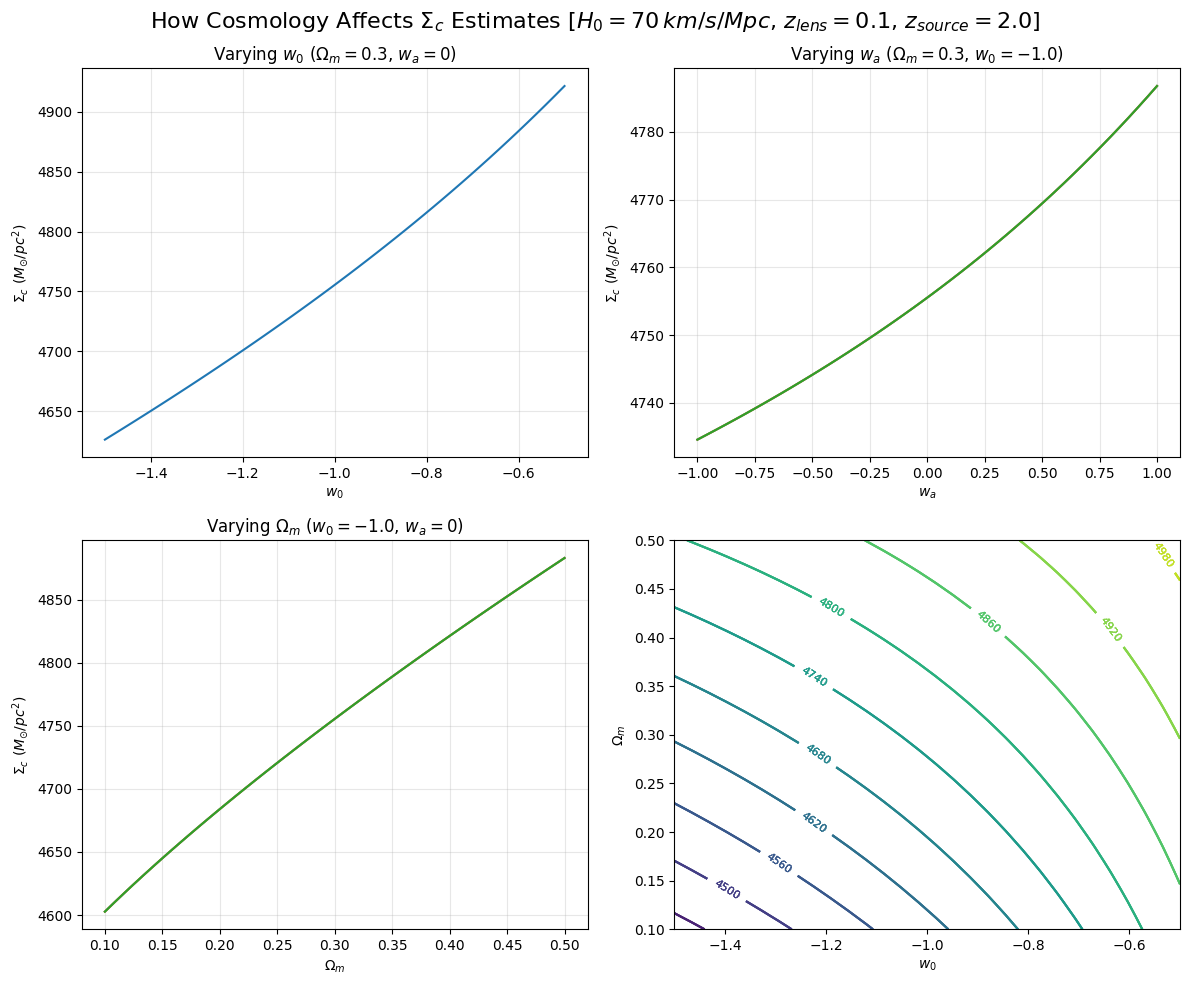

In [2]:
z_lens = 0.1
z_source = 2.0
H0 = 70 * u.km / (u.s * u.Mpc)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Vary w0 (keep Om0=0.3, wa=0, H0=70)
w0_vals_plot = np.linspace(-1.5, -0.5, 50)
Sigma_c_w0 = []
for w0_val in w0_vals_plot:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=w0_val, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_w0.append(Sigma_c_temp.value)

axes[0,0].plot(w0_vals_plot, Sigma_c_w0)
axes[0,0].set_xlabel('$w_0$')
axes[0,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,0].set_title('Varying $w_0$ ($\\Omega_m=0.3$, $w_a=0$)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

fig.suptitle('How Cosmology Affects $\\Sigma_c$ Estimates [$H_0=70 \\, km/s/Mpc$, $z_{lens}=$'+f'{z_lens}, '+'$z_{source}=$'+f'{z_source}]', fontsize=16)

fig.tight_layout()

stddev of mean Sigma_c values across cosmologies: 1462.0190873811437
mean of mean Sigma_c values across cosmologies: 7866.413403047493
percentage variation in mean Sigma_c values across cosmologies: 18.585586753103378 %


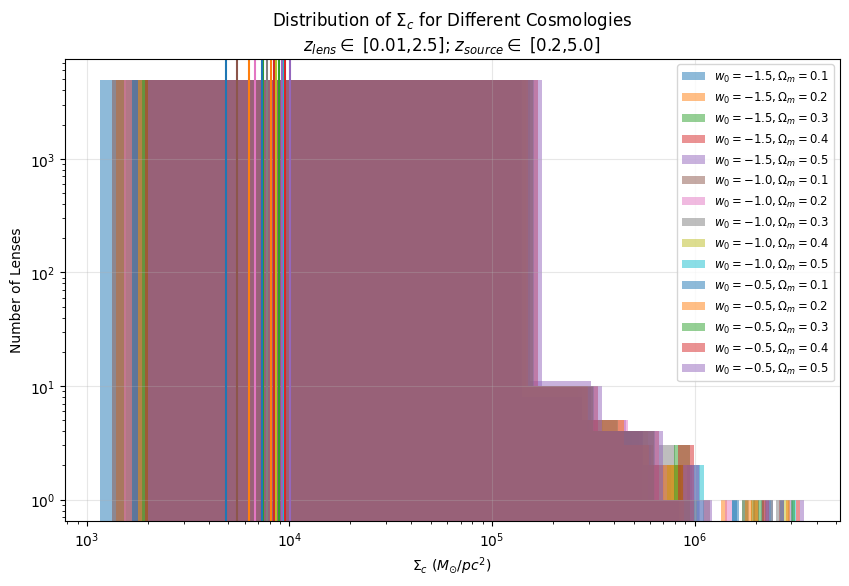

In [3]:
# now we see how Sigma_c changes with cosmology for a population of lenses

z_lens_vals = np.linspace(0.01, 2.5, 5000)
z_source_vals = []
i = 0
while i < len(z_lens_vals):
    z_lens = z_lens_vals[i]
    z_source = np.random.uniform(0.1, 5.0)
    if z_source > z_lens:
        z_source_vals.append(z_source)
        i += 1
z_source_vals = np.array(z_source_vals)

w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3,0.4, 0.5])

Sigma_c_matrix = np.zeros((len(z_lens_vals), len(w0_grid), len(Om0_grid)))
# calaculate Sigma_c function can handle array inputs for z_lens, z_source 

for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens_vals, z_source_vals, cosmo_temp)
        Sigma_c_matrix[:, j, k] = Sigma_c_temp.value

# Show histograms of Sigma_c for different cosmologies in same plot
plt.figure(figsize=(10, 6))
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        plt.hist(Sigma_c_matrix[:, j, k], bins=20, alpha=0.5, label=f'$w_0={w0_val}, \\Omega_m={Om0_val}$')
plt.xlabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_c$ for Different Cosmologies\n'+'$z_{lens}\\in$ ['+str(z_lens_vals.min())+','+str(z_lens_vals.max())+']'+'; $z_{source}\\in$ ['+f'{z_source_vals.min():.1f},{z_source_vals.max():.1f}]')
plt.legend(loc ='upper right', fontsize='small')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')


# Mean and stddev of Sigma_c for different cosmologies
mean_Sigma_c_vals = np.mean(Sigma_c_matrix, axis=0)
stddev_Sigma_c_vals = np.std(Sigma_c_matrix, axis=0)

num = 0
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        mean_val = mean_Sigma_c_vals[j, k]
        stddev_val = stddev_Sigma_c_vals[j, k]

        # overplot mean and stddev on histograms as vertical lines
        plt.axvline(mean_val, linestyle='-', color='C'+str(num))
        num += 1

print("stddev of mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals))
print("mean of mean Sigma_c values across cosmologies:", np.mean(mean_Sigma_c_vals))
print("percentage variation in mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals)/np.mean(mean_Sigma_c_vals)*100, "%")

stddev of mean Sigma_c values across cosmologies: 1420.3563975207965
mean of mean Sigma_c values across cosmologies: 7668.201776616368
percentage variation in mean Sigma_c values across cosmologies: 18.522678965648396 %


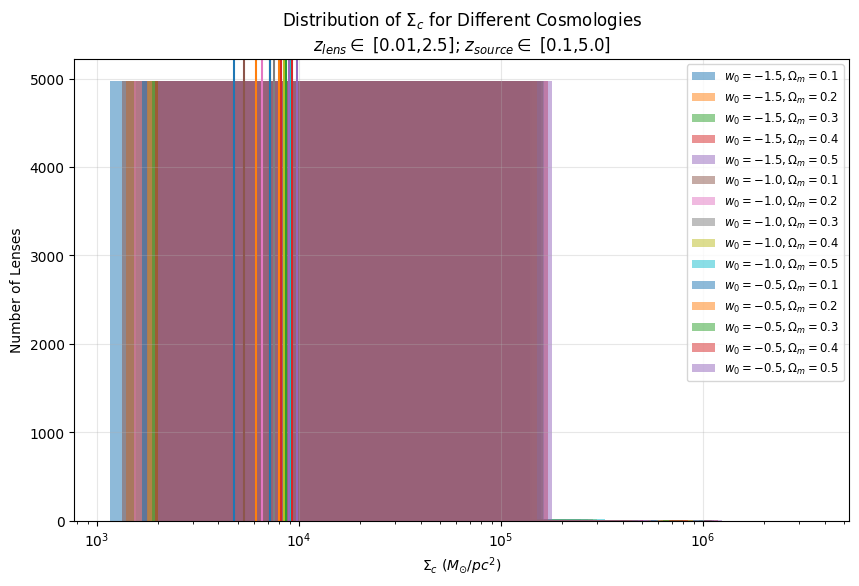

In [4]:
# now we see how Sigma_c changes with cosmology for a population of lenses

z_lens_vals = np.linspace(0.01, 2.5, 5000)
z_source_vals = []
i = 0
while i < len(z_lens_vals):
    z_lens = z_lens_vals[i]
    z_source = np.random.uniform(0.1, 5.0)
    if z_source > z_lens:
        z_source_vals.append(z_source)
        i += 1
z_source_vals = np.array(z_source_vals)

w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3,0.4, 0.5])

Sigma_c_matrix = np.zeros((len(z_lens_vals), len(w0_grid), len(Om0_grid)))
# calaculate Sigma_c function can handle array inputs for z_lens, z_source 

for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens_vals, z_source_vals, cosmo_temp)
        Sigma_c_matrix[:, j, k] = Sigma_c_temp.value

# Show histograms of Sigma_c for different cosmologies in same plot
plt.figure(figsize=(10, 6))
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        plt.hist(Sigma_c_matrix[:, j, k], bins=20, alpha=0.5, label=f'$w_0={w0_val}, \\Omega_m={Om0_val}$')
plt.xlabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_c$ for Different Cosmologies\n'+'$z_{lens}\\in$ ['+str(z_lens_vals.min())+','+str(z_lens_vals.max())+']'+'; $z_{source}\\in$ ['+f'{z_source_vals.min():.1f},{z_source_vals.max():.1f}]')
plt.legend(loc ='upper right', fontsize='small')
plt.grid(True, alpha=0.3)
plt.xscale('log')
# plt.yscale('log')


# Mean and stddev of Sigma_c for different cosmologies
mean_Sigma_c_vals = np.mean(Sigma_c_matrix, axis=0)
stddev_Sigma_c_vals = np.std(Sigma_c_matrix, axis=0)

num = 0
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        mean_val = mean_Sigma_c_vals[j, k]
        stddev_val = stddev_Sigma_c_vals[j, k]

        # overplot mean and stddev on histograms as vertical lines
        plt.axvline(mean_val, linestyle='-', color='C'+str(num))
        num += 1

print("stddev of mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals))
print("mean of mean Sigma_c values across cosmologies:", np.mean(mean_Sigma_c_vals))
print("percentage variation in mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals)/np.mean(mean_Sigma_c_vals)*100, "%")

### How Cosmology Affects the Pairing

In [16]:
# here we do the same but for pairing the lenses on the MFP and think about how cosmology affects the pairing!

sky_area = "1000.0"
GGL_data_table = Table.read(f"../data/norepeat_deflectors/GGL_{sky_area}_SQDEG_LSST_10yr.fits", format='fits')
# rename lens_id
GGL_data_table['lens_id'] = np.arange(len(GGL_data_table))
GGL_data_table

lens_id,z_D,z_S,theta_E,sigma_v_D,stellar_mass_D,mag_S_i,mag_S_r,mag_S_g,mag_S_z,mag_S_y,mag_D_i,mag_D_r,mag_D_g,mag_D_z,mag_D_y,size_D,e1_mass_D,e2_mass_D,e_mass_D,gamma_pl,R_e_kpc,Sigma_half_Msun/pc2,surf_bri_mag/arcsec2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
0,0.5422921796601345,4.638217605137028,0.6266746233869349,172.21951293027246,156903128493.03488,24.6669106378357,24.977237252798375,26.65811555125584,24.75079767527197,24.5929497379952,20.646736721399538,21.56545134246853,22.902884025277903,20.2695901620304,20.03825775020813,0.6172205764231248,-0.09198968386593932,0.08281080930991648,0.12377290525926427,2,3.9295369783032505,3475.4568048872643,24.34411014642516
1,1.1668144501081206,2.107867931513425,1.539157184536788,416.4059016332125,1560680291724.585,25.338923604825762,25.448868380103388,25.66022750914726,25.124032317007458,24.95433803628075,21.484380732083267,22.372972888737465,23.054850213918776,20.700405056823854,20.065230951003848,1.1072048744580938,-0.06946517696208823,-0.17564725380722074,0.1888845376953668,2,9.143117531171745,8689.545764953042,25.746348199661195
2,0.9268390891034295,2.595321831129954,0.8686480966261878,252.0576330963934,494848482196.93634,25.359289693756757,25.703177043474987,26.072876253458872,25.26419253094948,24.98196207468328,21.753237080114026,22.808775629337234,24.505792989742737,20.870291316093038,20.51389293225283,0.9036358588083453,-0.3569838109761175,-0.14003590021631493,0.3834677230855631,2,7.098370072222088,3969.349419852493,26.766457978168585
3,0.5950205984810821,3.3555645992443175,1.1206969302846537,240.5003518726843,440462891850.78656,25.518505423175966,25.636946328651433,25.934760217672654,25.408154678791746,25.327728005551116,19.899636878144005,21.00909461041145,22.524904722435974,19.50054166496623,19.223798921633783,0.6246519221038099,0.14978691099366456,-0.13449525569390494,0.2013084511618746,2,4.159944537301858,6360.475730824127,23.98708522317642
4,0.40052264971049834,4.64470298405119,0.6262415104710104,165.2650015694176,135040070023.75847,25.661952119036517,26.021848133151035,27.728217691328357,25.69045120135524,25.5117892584199,19.851631753440376,20.44964661119106,21.868634772475847,19.510912434900607,19.320913801323098,0.40596892539552176,0.08120930850795122,0.036414338841001544,0.08899975203092911,2,2.182978816613689,5771.600574711078,22.41289278771061
5,0.9376216080179688,4.376353752655217,0.8527777940918568,226.6873597274183,378451860436.96686,26.1693760865565,26.438563324399514,27.757345971374864,26.20500806639348,26.038008744540132,21.657578865742494,22.444166206867386,23.040659847637997,20.962634819806816,20.634246468219494,0.9889085248729563,0.16787619974253615,0.24865698392375682,0.3000211894084405,2,7.79250298470723,2977.8965209540975,25.56612478525861
6,0.29467886808563903,0.9410303261295712,0.751260802148742,203.6703187801239,278243191021.10376,24.231870303351883,24.962782642328584,25.440174995788944,23.712261728370997,23.47328487081878,18.199178314890947,18.714319038369172,19.921944263587516,17.919881624403605,17.721053110190685,0.5408670556606142,0.021601620086798338,-0.05411923658426278,0.05827110569431282,2,2.3794391440720433,8051.9215930696555,21.056279706538717
7,1.2763638258215488,3.4109860681914914,0.5853447717324188,220.85932979456513,355946845163.20233,24.032547141188406,24.126085800693982,24.514199843675296,23.92106528532867,23.807628433551702,23.479802977397373,24.33046278918103,24.657712957843604,22.889469708535703,22.147146486923862,0.5175746407184969,0.024014758035046026,0.014071234938434292,0.027833581447137226,2,4.327347832565133,5209.533356197705,25.68970513384416
8,0.40094696617706077,4.530218737162238,0.8244075033411992,189.8615379278417,222623825448.8137,25.89196020118267,26.227107809032816,27.772903497341353,25.960475421696543,25.773049218743104,19.29372582998119,19.854702945959104,21.030592929

In [17]:
# now we see how cosmology affects the difference in lensing mass density estimates for paired lenses
def find_difference_in_lensing_mass_density_for_pairs(data, pairs_table, cosmo_org, cosmo_new):
    idxs1 = np.array(pairs_table['lens_id_1'])
    idxs2 = np.array(pairs_table['lens_id_2'])

    # Sigma_1/2 = Sigma_c * (R/R_E)^(1-gamma)
    # Sigma_c = const.c**2 / (4 * np.pi * const.G) * D_S / (D_LS * D_L)

    Sigma_c_org_1 = calculate_critical_surface_density(data['z_D'][idxs1], data['z_S'][idxs1], cosmo_org).value
    Sigma_c_org_2 = calculate_critical_surface_density(data['z_D'][idxs2], data['z_S'][idxs2], cosmo_org).value
    Sigma_c_new_1 = calculate_critical_surface_density(data['z_D'][idxs1], data['z_S'][idxs1], cosmo_new).value
    Sigma_c_new_2 = calculate_critical_surface_density(data['z_D'][idxs2], data['z_S'][idxs2], cosmo_new).value

    Sigma_half_old_1 = data['Sigma_half_Msun/pc2'][idxs1].value
    Sigma_half_old_2 = data['Sigma_half_Msun/pc2'][idxs2].value

    Sigma_half_new_1 = Sigma_half_old_1 * (Sigma_c_new_1 / Sigma_c_org_1)
    Sigma_half_new_2 = Sigma_half_old_2 * (Sigma_c_new_2 / Sigma_c_org_2)

    delta_Sigma_half_old = Sigma_half_old_1 - Sigma_half_old_2
    delta_Sigma_half_new = Sigma_half_new_1 - Sigma_half_new_2

    log_delta_Sigma_half_old = np.log10(Sigma_half_old_1) - np.log10(Sigma_half_old_2)
    log_delta_Sigma_half_new = np.log10(Sigma_half_new_1) - np.log10(Sigma_half_new_2)

    return delta_Sigma_half_old, delta_Sigma_half_new, log_delta_Sigma_half_old, log_delta_Sigma_half_new


--- Running simulation for 23096 lenses ---
x_std: 0.21979830907579348, y_std: 0.13528934835739934
Using bin widths of 0.06 in x and 0.04 in y for pairing.
Using 28 bins in x and 28 bins in y for pairing.
Finding pairs in the binned data...
Found 31647 pairs.
----- Statistics for log_delta_Sigma_half_new -----
w0=-1.5, Om0=0.1: stddev = 0.0169, mean = 0.0004
w0=-1.5, Om0=0.2: stddev = 0.0159, mean = 0.0004
w0=-1.5, Om0=0.3: stddev = 0.0157, mean = 0.0004
w0=-1.5, Om0=0.4: stddev = 0.0158, mean = 0.0004
w0=-1.5, Om0=0.5: stddev = 0.0159, mean = 0.0004
w0=-1.0, Om0=0.1: stddev = 0.0159, mean = 0.0004
w0=-1.0, Om0=0.2: stddev = 0.0157, mean = 0.0004
w0=-1.0, Om0=0.3: stddev = 0.0157, mean = 0.0004
w0=-1.0, Om0=0.4: stddev = 0.0158, mean = 0.0004
w0=-1.0, Om0=0.5: stddev = 0.0159, mean = 0.0004
w0=-0.5, Om0=0.1: stddev = 0.0164, mean = 0.0004
w0=-0.5, Om0=0.2: stddev = 0.0163, mean = 0.0004
w0=-0.5, Om0=0.3: stddev = 0.0163, mean = 0.0004
w0=-0.5, Om0=0.4: stddev = 0.0163, mean = 0.0004
w

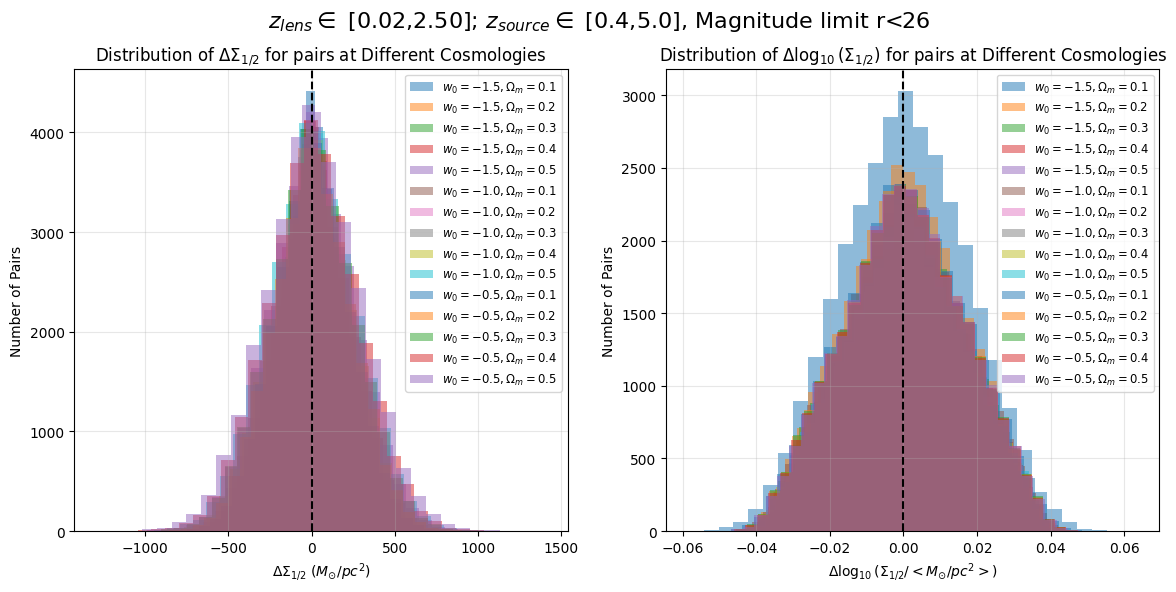

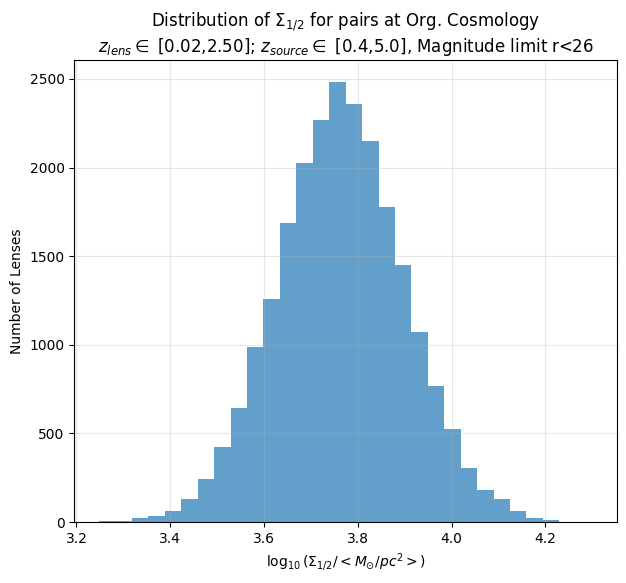

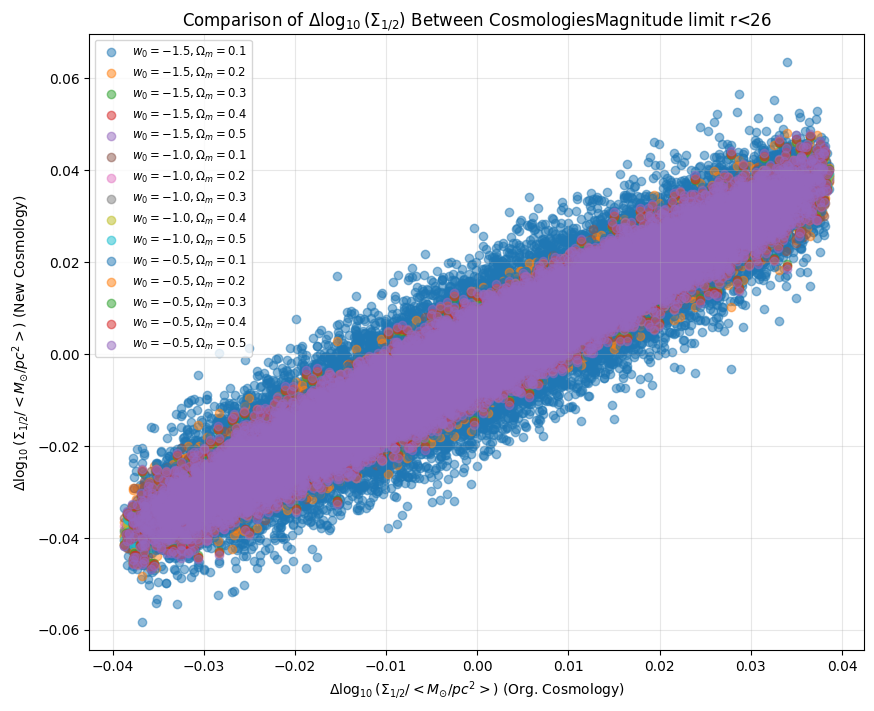

In [18]:
data = GGL_data_table.copy()
magnitude_limit_r = 26

num_pairs, pairs_table = run_pairing_simulation_from_data(data, threshold_rel_delta_z=0.01, 
                                     verbose=True)


# make a grid of cosmologies to test
w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
cosmo_org = Flatw0waCDM(H0=70 * u.km / (u.s * u.Mpc), Om0=0.3, w0=-1.0, wa=0)

delta_Sigma_half_old_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan
delta_Sigma_half_new_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan
log_delta_Sigma_half_old_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan
log_delta_Sigma_half_new_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan

for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        cosmo_new = Flatw0waCDM(H0=70 * u.km / (u.s * u.Mpc), Om0=Om0, w0=w0, wa=0)
        delta_Sigma_half_old, delta_Sigma_half_new, log_delta_Sigma_half_old, log_delta_Sigma_half_new = find_difference_in_lensing_mass_density_for_pairs(data, pairs_table, cosmo_org, cosmo_new)
        delta_Sigma_half_old_all[i, j, :] = delta_Sigma_half_old
        delta_Sigma_half_new_all[i, j, :] = delta_Sigma_half_new
        log_delta_Sigma_half_old_all[i, j, :] = log_delta_Sigma_half_old
        log_delta_Sigma_half_new_all[i, j, :] = log_delta_Sigma_half_new


# plot histograms of delta_Sigma_half_new and log_delta_Sigma_half_new for each cosmology

# make two axes, one for delta_Sigma_half and one for log_delta_Sigma_half

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histograms of delta_Sigma_half_new
for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        axes[0].hist(delta_Sigma_half_new_all[i, j, :], bins=30, alpha=0.5, label=f'$w_0={w0}, \\Omega_m={Om0}$')
axes[0].set_xlabel('$\\Delta \\Sigma_{1/2}$ ($M_{\\odot} / pc^2$)')
axes[0].set_ylabel('Number of Pairs')
axes[0].set_title('Distribution of $\\Delta \\Sigma_{1/2}$ for pairs at Different Cosmologies')
axes[0].legend(loc ='upper right', fontsize='small')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(0, color='k', linestyle='--')
# axes[0].set_yscale('log')
# axes[0].set_xscale('log')

print("----- Statistics for log_delta_Sigma_half_new -----")
# Plot histograms of log_delta_Sigma_half_new
for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        print(f"w0={w0}, Om0={Om0}: stddev = {np.nanstd(log_delta_Sigma_half_new_all[i, j, :]):.4f}, mean = {np.nanmean(log_delta_Sigma_half_new_all[i, j, :]):.4f}")
        axes[1].hist(log_delta_Sigma_half_new_all[i, j, :], bins=30, alpha=0.5, label=f'$w_0={w0}, \\Omega_m={Om0}$')

print("stddev of log_delta_Sigma_half_new values across cosmologies:", np.nanstd(log_delta_Sigma_half_new_all))
axes[1].set_xlabel('$\\Delta\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$')
axes[1].set_ylabel('Number of Pairs')
axes[1].set_title('Distribution of $\\Delta\\log_{10}(\\Sigma_{1/2})$ for pairs at Different Cosmologies')
axes[1].legend(loc ='upper right', fontsize='small')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(0, color='k', linestyle='--')
# axes[1].set_yscale('log')
# axes[1].set_xscale('log')
print("----------------------------------------------")

fig.suptitle('$z_{lens}\\in$ ['+f'{data['z_D'].min():.2f}'+','+f'{data['z_D'].max():.2f}'+']'+'; $z_{source}\\in$ ['+f'{data["z_S"].min():.1f},{data["z_S"].max():.1f}], Magnitude limit r<'+f'{magnitude_limit_r}', fontsize=16)



# for reference also plots the distribution of Sigma_half at the orginal cosmology

plt.figure(figsize=(7, 6))
plt.hist(np.log10(data['Sigma_half_Msun/pc2']), bins=30, alpha=0.7, color='C0')
plt.xlabel('$\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_{1/2}$ for pairs at Org. Cosmology\n'+'$z_{lens}\\in$ ['+f'{data['z_D'].min():.2f}'+','+f'{data['z_D'].max():.2f}'+']'+'; $z_{source}\\in$ ['+f'{data["z_S"].min():.1f},{data["z_S"].max():.1f}], Magnitude limit r<'+f'{magnitude_limit_r}')
plt.grid(True, alpha=0.3)
print("stddev of log10 Sigma_half values at org. cosmology:", np.nanstd(np.log10(data['Sigma_half_Msun/pc2'])))


plt.figure(figsize=(10, 8))
for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        plt.scatter(log_delta_Sigma_half_old_all[i, j, :], log_delta_Sigma_half_new_all[i, j, :], alpha=0.5, label=f'$w_0={w0}, \\Omega_m={Om0}$')
plt.xlabel('$\\Delta\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$ (Org. Cosmology)')
plt.ylabel('$\\Delta\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$ (New Cosmology)')
plt.title('Comparison of $\\Delta\\log_{10}(\\Sigma_{1/2})$ Between Cosmologies'+f'Magnitude limit r<{magnitude_limit_r}')
plt.legend(loc ='upper left', fontsize='small')
plt.grid(True, alpha=0.3)

sig_int:     0.0000  268688176.4220
Computing sig_int
sig_int:     0.0000  268688176.4220
sig_int:     0.0040     -0.0140
sig_int:     0.0040     -0.0130
sig_int:     0.0040      0.0001
sig_int:     0.0040     -0.0009
Computing sig_int error
sig_int:     0.0040      0.0047
sig_int:     0.0040     -0.0095
sig_int:     0.0040     -0.0000
sig_int:     0.0040      0.0010
Repeating at best fitting solution
sig_int:     0.0040      0.0001

################# Values and formal errors ################

        a =  -0.33718 +/- 0.00041
      b_0 =  -1.00014 +/- 0.00010
      b_1 =  1.99974 +/- 0.00019
  scatter =  0.0040158 +/- 9.4e-06
Observed rms scatter: 0.00402
y = a + (x_0 - p_0) b_0 + (x_1 - p_1) b_1
   p_0 = 0.000
   p_1 = 0.000
Adopted clip = 10.00*sigma; Fitted/Clipped = 98254/49
Non-clipped Spearman r = 1.0 and p = 0.0
Non-clipped Pearson r = 1.0 and p = 0.0
Execution time 209.38 s

###########################################################

Best fitting parameters: [-0.33717954 -1.0

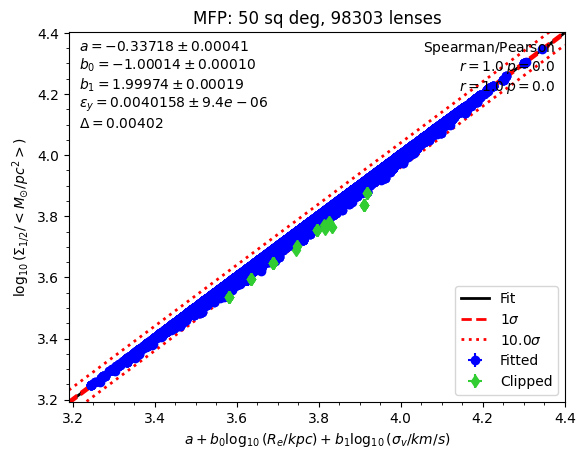

In [10]:
# draw the MFP with Sigma_half on y axis

x1 = np.log10(GGL_data_table["R_e_kpc"])
x2 = np.log10(GGL_data_table["sigma_v_D"])
y = np.log10(GGL_data_table["Sigma_half_Msun/pc2"])

#arrays
x1, x2, y = np.array(x1), np.array(x2), np.array(y)

x = np.column_stack([x1, x2])
sigx = np.ones_like(x)*0.0000001
sigy = np.ones_like(y)*0.0000001  # Example uncertainty for y

p = ltsfit(x, y, sigx, sigy, corr=True, epsy=True, clip = 10,
           frac=None, label='Fitted',
           legend=True,plot=True, text=True)

# label axes appropriately
plt.ylabel('$\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$')
plt.xlabel('$a + b_0 \\log_{10}(R_e/kpc) + b_1 \\log_{10}(\\sigma_v/km/s)$')
plt.title(f'MFP: {50} sq deg, {len(x)} lenses')

print(f"Best fitting parameters: {p.coef}")
print(f"Scatter in log sigma_v: {p.sig_int} dex")
print(f"Scatter in sigma_v: {p.sig_int*np.log(10)*100:.2f} %")


In [11]:
mask = (GGL_data_table['mag_D_r'] < 24) & (GGL_data_table['mag_S_r'] < 24)

GGL_data_table[mask]

lens_id,z_D,z_S,theta_E,sigma_v_D,stellar_mass_D,mag_S_i,mag_S_r,mag_S_g,mag_S_z,mag_S_y,mag_D_i,mag_D_r,mag_D_g,mag_D_z,mag_D_y,size_D,e1_mass_D,e2_mass_D,e_mass_D,gamma_pl,R_e_kpc,Sigma_half_Msun/pc2,surf_bri_mag/arcsec2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
37,0.8342416197762105,3.051234011603175,0.7413631721054412,216.14273163718156,330022301614.27844,23.845213707054953,23.96484113116496,24.0761408877377,23.73737983682286,23.755394359600523,21.657451640149727,22.69683432519425,23.84287536346861,20.905185356687316,20.630939751882178,0.44961433199137535,-0.010554456514395195,0.005101971938605339,0.011722912179854265,2,3.4230585614477453,6308.510329349966,24.569141557654593
46,0.7880577740063452,2.4357735128924785,0.6549431316647373,208.76937611442844,302124811660.7876,23.19507131038599,23.371808529660917,23.582942687205993,23.09991184633163,22.901155038951075,21.43822448613206,22.58610197919378,23.877885049739536,20.788260753710166,20.514244140165186,0.3045198185799542,0.0009594363758146743,0.015229972022079138,0.015260162710552916,2,2.2746301871995454,8856.740907906245,23.788401611207625
59,0.9335576201778213,2.6261172397535426,0.8322474335347047,246.67654382542784,463302286794.01044,23.624594584086424,23.891898569955302,24.119799343954043,23.544934697200425,23.332584754938694,21.975393561052208,23.063306650772596,24.748190958170618,21.06780830576602,20.6778964850115,0.5240688571895934,0.0031105222421683007,0.022696554164428135,0.02290870837820945,2,4.124804050422118,6818.255254416055,25.819312818522768
106,0.3262061486467959,1.3616205829895192,1.4031019580178055,266.44580770108695,591976554451.3118,23.590959897786696,23.935537309185825,24.234988383827037,23.33674428287072,22.887484002859395,17.68856109850834,18.250916948204218,19.584809722744584,17.391296817461996,17.187570017015968,0.9423542228815233,-0.37172361388755754,-0.22561444608653,0.43483367326433875,2,4.443811152148289,6995.440436198739,21.998453712490516
115,0.05130629405497996,1.9258072032527311,1.634194517655158,243.30989528855872,453497151049.5961,22.73455827824976,22.776041903565567,22.952556121679233,22.53268201637812,22.39591468530089,13.387562464074286,13.738981872049372,14.46841129801227,13.168964863976491,13.002077109213765,6.235551457842188,0.22008295477770065,-0.10791299538375945,0.2451157309443413,2,6.244794869660903,4312.504727343951,20.932151258790018
131,0.9647575161537322,2.5765111903606823,0.7300451650346215,235.58366710151435,416062470955.57574,23.84073662364402,23.950419272709887,23.994980590467847,23.911022657219327,23.863187701745503,21.659368046243628,22.42970352850017,23.028354013731715,20.936741265877217,20.58693407565282,0.6331499954453261,-0.15237440138104663,0.03195003808978012,0.15568803142878615,2,5.026354568331297,5071.420080526323,24.516358890385202
168,0.8334551567725745,1.7571205239554313,0.8522795530925089,271.3342550538816,625990691804.0234,23.394207832070972,23.704089850916947,23.98868824525236,23.12189136614742,23.00008224278751,20.876468012736332,21.98579139103201,23.4869184583715,20.127450150638914,19.87355380582622,0.9551005422409446,0.02538486569574783,0.1331106831646547,0.13550957670567879,2,7.269279976169502,4660.880089216054,25.87569120084525
171,0.28953992271703477,1.3987595389279648,1.1543311764325126,235.2962102279142,414864852822.9,22.991185414865118,23.39721548863132,23.55820644727518,22.668428142987235,22.112550180747117,17.7550537066724,18.302032382286463,19.657006548079778,17.479339972802016,17.26213206603014,1.078764986492679,0.05397169920601245,0.05934391674733949,0.0802162375713262,2,4.687824168207186,5450.491816017627,22.284367366841625
184,0.2936197569165969,1.5877694608260078,0.8896098862182382,204.01999100875952,279577897998.59393,23.329686871403123,23.513527811747334,23.646466116844426,23.220649119293693,22.99793508885853,18.218579714129742,18.761442083752